# Car Feature Evaluation
### Data Science NanoDegree Term 2 Project 1
Jesse Fredrickson 4/28/19

The purpose of this notebook is to read in, clean, and investigate data pertaining to car models from 1990 to the present

Questions for analysis:
- How has the miles per gallon (MPG) evolved over the years?
- What factors have driven (haha) this change?

In [507]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [508]:
raw = pd.read_csv('fullspecs.csv', index_col = 0, header = None, dtype=object).T
raw.head()

,nan,MSRP,Gas Mileage,Engine,EPA Class,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,...,Fourth Hip Room (in),Fourth Leg Room (in),Fourth Shoulder Room (in),Fourth Head Room (in),Fifth Shoulder Room (in),Fifth Head Room (in),Fifth Hip Room (in),Fifth Leg Room (in),Corrosion Note,Hybrid/Electric Components Note
1,2019 Acura RDX Specs: FWD w/Technology Pkg,"$40,600",22 mpg City/28 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/Technology Pkg,Front Wheel Drive,5,4,Sport Utility,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019 Acura RDX Specs: FWD w/Advance Pkg,"$45,500",22 mpg City/28 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/Advance Pkg,Front Wheel Drive,5,4,Sport Utility,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019 Acura RDX Specs: FWD w/A-Spec Pkg,"$43,600",22 mpg City/27 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/A-Spec Pkg,Front Wheel Drive,5,4,Sport Utility,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019 Acura RDX Specs: FWD,"$37,400",22 mpg City/28 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD,Front Wheel Drive,5,4,Sport Utility,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019 Acura RDX Specs: AWD w/Technology Pkg,"$42,600",21 mpg City/27 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 4WD,AWD w/Technology Pkg,All Wheel Drive,5,4,Sport Utility,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [509]:
raw.shape

(32316, 235)

In [510]:
raw.isnull().sum().sort_values()

0
NaN                                             0
Air Bag-Frontal-Driver                          0
Air Bag-Frontal-Passenger                       0
Air Bag-Passenger Switch (On/Off)               0
Air Bag-Side Body-Front                         0
Air Bag-Side Body-Rear                          0
Air Bag-Side Head-Front                         0
Air Bag-Side Head-Rear                          0
Child Safety Rear Door Locks                    0
Daytime Running Lights                          0
Traction Control                                0
Night Vision                                    0
Rollover Protection Bars                        0
Fog Lamps                                       0
Brakes-ABS                                      0
Tire Pressure Monitor                           0
Back-Up Camera                                  0
Stability Control                               0
Passenger Doors                                 0
Parking Aid                                     

## cleaning steps
- Rename first col to "model"
- convert MSRP to float
- Convert number columns to floats
- parse year from model
- parse Displacement Column
- parse engine style from Engine?
- Parse SAE Net Torque @ RPM
- parse SAE Net Horsepower @ RPM
- Handle - TBD - entries
- Convert Yes/No to boolean
- Decide how to handle missing

In [511]:
# rename first column to model
df = raw.rename(index=str, columns={np.nan: "model"})
df.head()

,model,MSRP,Gas Mileage,Engine,EPA Class,Style Name,Drivetrain,Passenger Capacity,Passenger Doors,Body Style,...,Fourth Hip Room (in),Fourth Leg Room (in),Fourth Shoulder Room (in),Fourth Head Room (in),Fifth Shoulder Room (in),Fifth Head Room (in),Fifth Hip Room (in),Fifth Leg Room (in),Corrosion Note,Hybrid/Electric Components Note
1,2019 Acura RDX Specs: FWD w/Technology Pkg,"$40,600",22 mpg City/28 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/Technology Pkg,Front Wheel Drive,5,4,Sport Utility,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019 Acura RDX Specs: FWD w/Advance Pkg,"$45,500",22 mpg City/28 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/Advance Pkg,Front Wheel Drive,5,4,Sport Utility,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019 Acura RDX Specs: FWD w/A-Spec Pkg,"$43,600",22 mpg City/27 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD w/A-Spec Pkg,Front Wheel Drive,5,4,Sport Utility,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019 Acura RDX Specs: FWD,"$37,400",22 mpg City/28 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 2WD,FWD,Front Wheel Drive,5,4,Sport Utility,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019 Acura RDX Specs: AWD w/Technology Pkg,"$42,600",21 mpg City/27 mpg Hwy,"Turbo Premium Unleaded I-4, 2.0 L",Small Sport Utility Vehicles 4WD,AWD w/Technology Pkg,All Wheel Drive,5,4,Sport Utility,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [512]:
# replace '- TBD -' with np.nan
df.replace('- TBD -', np.nan, inplace = True)
df.replace('', np.nan, inplace = True)

In [513]:
# convert MSRP to float
df['MSRP'] = df['MSRP'].replace('[\$,]', '', regex=True).astype(float)
df['MSRP'].head()

1    40600.0
2    45500.0
3    43600.0
4    37400.0
5    42600.0
Name: MSRP, dtype: float64

In [514]:
# Convert number columns to floats
floatlist1 = ['Passenger Capacity', 'Passenger Doors', 'Base Curb Weight (lbs)', 'Front Hip Room (in)', 'Front Leg Room (in)', 'Second Shoulder Room (in)', 'Passenger Volume (ft³)', 'Second Head Room (in)',
             'Front Shoulder Room (in)', 'Second Hip Room (in)', 'Front Head Room (in)', 'Second Leg Room (in)', 'Wheelbase (in)', 'Min Ground Clearance (in)', 'Track Width, Front (in)', 'Width, Max w/o mirrors (in)',
             'Track Width, Rear (in)', 'Height, Overall (in)', 'Cargo Volume to Seat 1 (ft³)', 'Cargo Volume to Seat 2 (ft³)', 'Cargo Volume to Seat 3 (ft³)',
             'First Gear Ratio (:1)', 'Sixth Gear Ratio (:1)', 'Fourth Gear Ratio (:1)', 
             'Seventh Gear Ratio (:1)', 'Second Gear Ratio (:1)', 'Reverse Ratio (:1)', 'Fifth Gear Ratio (:1)', 'Eighth Gear Ratio (:1)', 'Trans Type', 'Third Gear Ratio (:1)', 'Final Drive Axle Ratio (:1)',
             'Rear Brake Rotor Diam x Thickness (in)', 'Front Brake Rotor Diam x Thickness (in)', 'Turning Diameter - Curb to Curb (ft)', 'Basic Miles/km', 'Corrosion Years', 'Drivetrain Miles/km',
             'Roadside Assistance Miles/km']

floatlist2 = ['Fuel Tank Capacity, Approx (gal)', 'Fuel Economy Est-Combined (MPG)', 'EPA Fuel Economy Est - City (MPG)', 'EPA Fuel Economy Est - Hwy (MPG)']

for col in floatlist1:
    try:
        #                 Remove all besides numbers and .    Save only last occurrence of .          Replace blank strings with np.nan
        df[col] = df[col].replace('[^\d.]', '', regex = True).replace('\.(?=[^.]*\.)','', regex=True).replace('', np.nan).astype(float)
        print('processed: ' + str(col))
    except Exception as e:
        print('FAILED for ' + str(col))
        print(e)
        
for col in floatlist2:
    try:
        #                 Remove all between ()               Remove all besides numbers and .
        df[col] = df[col].replace('\(.*\)', '', regex = True).replace('[^\d.]', '', regex = True).replace('', np.nan).astype(float)
        print('processed: ' + str(col))
    except Exception as e:
        print('FAILED for ' + str(col))
        print(e)
        
# Ensure that no extra columns got added somehow
print(raw.shape)
print(df.shape)

processed: Passenger Capacity
processed: Passenger Doors
processed: Base Curb Weight (lbs)
processed: Front Hip Room (in)
processed: Front Leg Room (in)
processed: Second Shoulder Room (in)
processed: Passenger Volume (ft³)
processed: Second Head Room (in)
processed: Front Shoulder Room (in)
processed: Second Hip Room (in)
processed: Front Head Room (in)
processed: Second Leg Room (in)
processed: Wheelbase (in)
processed: Min Ground Clearance (in)
processed: Track Width, Front (in)
processed: Width, Max w/o mirrors (in)
processed: Track Width, Rear (in)
processed: Height, Overall (in)
processed: Cargo Volume to Seat 1 (ft³)
processed: Cargo Volume to Seat 2 (ft³)
processed: Cargo Volume to Seat 3 (ft³)
processed: First Gear Ratio (:1)
processed: Sixth Gear Ratio (:1)
processed: Fourth Gear Ratio (:1)
processed: Seventh Gear Ratio (:1)
processed: Second Gear Ratio (:1)
processed: Reverse Ratio (:1)
processed: Fifth Gear Ratio (:1)
processed: Eighth Gear Ratio (:1)
processed: Trans Type


In [515]:
# parse year from model
df['model_year'] = df['model'].str.extract('(\d{4})').astype(int)
df['model_year'].value_counts(dropna=False)

2018    2801
2019    2431
2016    2225
2015    2103
2013    1898
2014    1897
2012    1870
2011    1671
2010    1456
2009    1437
2008    1382
2007    1294
2006    1192
2005    1116
2004    1034
2003     848
2002     753
2001     732
2000     586
1999     543
1998     471
1997     469
1996     391
1995     385
1994     298
1992     286
1991     261
1993     251
1990     235
Name: model_year, dtype: int64

In [516]:
# Parse displacement column
df['Displacement_parse'] = df['Displacement'].str.extract('(\d+\.?\d+)')
df['Displacement_parse'].replace('', np.nan, inplace = True)
df['Displacement_parse'] = df['Displacement_parse'].str.strip()
df['Displacement_parse'] = df['Displacement_parse'].astype(float)


In [517]:
# parse HP column for HP and RPM
df['SAE HP parse'] = df['SAE Net Horsepower @ RPM'].str.split(' ')
df['SAE HP'] = df['SAE HP parse'].str[0]
df['SAE HP RPM'] = df['SAE HP parse'].str[-1]

# drop intermediate column
df.drop(columns = ['SAE HP parse'], inplace = True)

# convert to floats
def to_number(s):
    try:
        s1 = float(s)
        return s1
    except ValueError:
        return np.nan
    
df['SAE HP'] = df['SAE HP'].apply(lambda x : to_number(x))  
df['SAE HP RPM'] = df['SAE HP RPM'].apply(lambda x : to_number(x))

In [518]:
 # parse Torque column for Torque and RPM
df['SAE Torque parse'] = df['SAE Net Torque @ RPM'].str.split(' ')
df['SAE Torque'] = df['SAE Torque parse'].str[0]
df['SAE Torque RPM'] = df['SAE Torque parse'].str[-1]

# drop intermediate column
df.drop(columns = ['SAE Torque parse'], inplace = True)

# convert to floats
df['SAE Torque'] = df['SAE Torque'].apply(lambda x : to_number(x))  
df['SAE Torque RPM'] = df['SAE Torque RPM'].apply(lambda x : to_number(x))

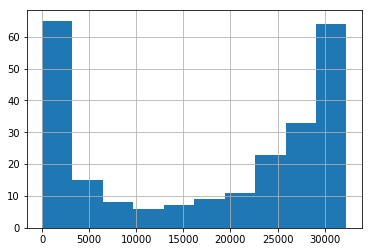

In [519]:
# Count NaNs
df.isnull().sum().sort_values().hist();

In [520]:
# investigating MPG
MPG_response = ['Fuel Tank Capacity, Approx (gal)', 'Fuel Economy Est-Combined (MPG)', 'EPA Fuel Economy Est - City (MPG)', 'EPA Fuel Economy Est - Hwy (MPG)']
df[MPG_response].isnull().sum()

0
Fuel Tank Capacity, Approx (gal)      2168
Fuel Economy Est-Combined (MPG)      14910
EPA Fuel Economy Est - City (MPG)     5289
EPA Fuel Economy Est - Hwy (MPG)      5293
dtype: int64

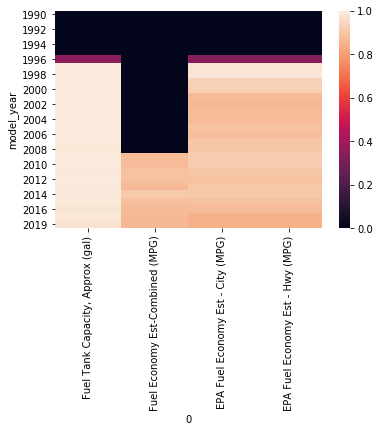

In [521]:
# Heatmap to show what percentage of values exists per year
sns.heatmap(1/df.groupby('model_year').count().rdiv(df.groupby('model_year').size(), axis=0)[MPG_response]);

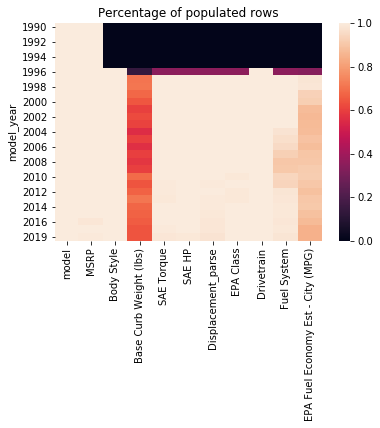

In [522]:
# Heatmap showing how many missing predictor values there are per year
MPG_predicting = ['model', 'MSRP', 'Body Style', 'Base Curb Weight (lbs)', 'SAE Torque', 'SAE HP', 'Displacement_parse', 'EPA Class', 'Drivetrain', 'Fuel System','EPA Fuel Economy Est - City (MPG)']
sns_plot = sns.heatmap(1/df.groupby('model_year').count().rdiv(df.groupby('model_year').size(), axis=0)[MPG_predicting]);
sns_plot.set_title('Percentage of populated rows')
sns_plot.set_xlabel('')
sns_plot.get_figure().savefig('im0', bbox_inches = "tight")

In [523]:
MPG_features = ['model_year', 'MSRP', 'Body Style', 'SAE Torque', 'SAE HP', 'Displacement_parse', 'Drivetrain', 'Fuel System', 'EPA Fuel Economy Est - City (MPG)']
# removed: model, EPA Class, 
fullresponse_df = df.dropna(subset = ['EPA Fuel Economy Est - City (MPG)'])[MPG_features]
fullresponse_df.head()

,model_year,MSRP,Body Style,SAE Torque,SAE HP,Displacement_parse,Drivetrain,Fuel System,EPA Fuel Economy Est - City (MPG)
1,2019,40600.0,Sport Utility,280.0,272.0,2.0,Front Wheel Drive,Gasoline Direct Injection,22.0
2,2019,45500.0,Sport Utility,280.0,272.0,2.0,Front Wheel Drive,Gasoline Direct Injection,22.0
3,2019,43600.0,Sport Utility,280.0,272.0,2.0,Front Wheel Drive,Gasoline Direct Injection,22.0
4,2019,37400.0,Sport Utility,280.0,272.0,2.0,Front Wheel Drive,Gasoline Direct Injection,22.0
5,2019,42600.0,Sport Utility,280.0,272.0,2.0,All Wheel Drive,Gasoline Direct Injection,21.0


In [524]:
# Clean drivetrain categories
drivetrain_dict = {'Front Wheel Drive' :'Front Wheel Drive',
                   'Rear Wheel Drive': 'Rear Wheel Drive',
                   'All Wheel Drive': 'All Wheel Drive',
                   '4-Wheel Drive': '4 Wheel Drive',
                   'Four Wheel Drive': '4 Wheel Drive',
                   'All-Wheel Drive': 'All Wheel Drive',
                   '4 Wheel Drive': '4 Wheel Drive',
                   'Front-Wheel Drive': 'Front Wheel Drive',
                   'Four-Wheel Drive': '4 Wheel Drive',
                   'Rear wheel drive': 'Rear Wheel Drive',
                   'Front wheel drive': 'Front Wheel Drive',
                   'AWD': 'All Wheel Drive',
                   'Rear-Wheel Drive': 'Rear Wheel Drive',
                   '4WD': '4 Wheel Drive',
                   'All wheel drive': 'All Wheel Drive',
                   '2 Wheel Drive': '2 Wheel Drive',
                   'REAR WHEEL DRIVE': 'Rear Wheel Drive',
                   'Four wheel drive': '4 Wheel Drive',
                   'All-wheel drive': 'All Wheel Drive',
                   'Front-wheel drive': 'Front Wheel Drive',
                   '2WD': '2 Wheel Drive',
                   '2-Wheel Drive': '2 Wheel Drive',
                   'RWD': 'Rear Wheel Drive',
                   '4-wheel Drive': '4 Wheel Drive'
                  }
fullresponse_df['Drivetrain'] = fullresponse_df['Drivetrain'].map(drivetrain_dict)
fullresponse_df['Drivetrain'].value_counts()

Front Wheel Drive    8772
Rear Wheel Drive     7400
All Wheel Drive      5723
4 Wheel Drive        5093
2 Wheel Drive          39
Name: Drivetrain, dtype: int64

In [525]:
# Clean body style categories
bodystyle_dict = {'2dr Car':'2dr Car',
                  '3dr Car':'Hatchback',
                  '4dr Car':'4dr Car',
                  'Convertible':'Convertible',
                  'Crew Cab Pickup':'Crew Cab Pickup',
                  'Crew Cab Pickup - Long Bed':'Crew Cab Pickup',
                  'Crew Cab Pickup - Short Bed':'Crew Cab Pickup',
                  'Crew Cab Pickup - Standard Bed':'Crew Cab Pickup',
                  'Extended Cab Pickup': 'Extended Cab Pickup',
                  'Extended Cab Pickup - Long Bed':'Extended Cab Pickup',
                  'Extended Cab Pickup - Short Bed':'Extended Cab Pickup',
                  'Extended Cab Pickup - Standard Bed':'Extended Cab Pickup',
                  'Full-size Cargo Van':'Full size Van',
                  'Full-size Passenger Van':'Full size Van',
                  'Hatchback':'4dr Car',
                  'Mini-van, Cargo':'Minivan',
                  'Mini-van, Passenger':'Minivan',
                  'Regular Cab Chassis-Cab':'Regular Cab Pickup',
                  'Regular Cab Pickup - Long Bed':'Regular Cab Pickup',
                  'Regular Cab Pickup - Short Bed':'Regular Cab Pickup',
                  'Regular Cab Pickup - Standard Bed':'Regular Cab Pickup',
                  'Sport Utility':'SUV',
                  'Station Wagon':'Station Wagon'
                 }
fullresponse_df['Body Style'] = fullresponse_df['Body Style'].map(bodystyle_dict)
fullresponse_df['Body Style'].value_counts()

4dr Car                8557
SUV                    7466
2dr Car                2341
Crew Cab Pickup        2205
Extended Cab Pickup    2014
Convertible            1371
Regular Cab Pickup     1336
Station Wagon          1016
Minivan                 497
Full size Van           181
Hatchback                43
Name: Body Style, dtype: int64

In [526]:
#clean NaNs - revisit this
fullresponse_df.dropna(inplace = True)
fullresponse_df.shape

(26249, 9)

## Visualizations

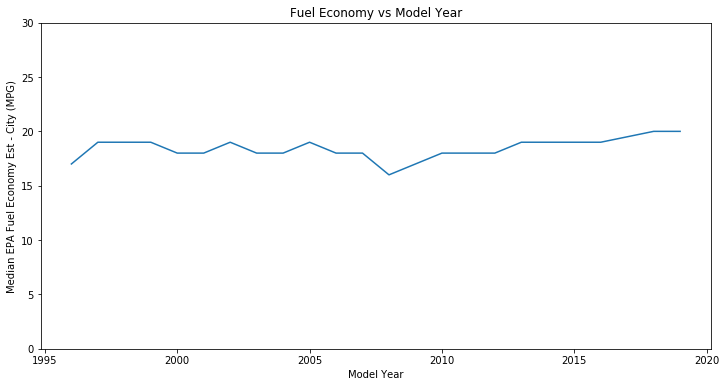

In [527]:
# how has average mpg changed throughout the years?
fig, ax = plt.subplots(figsize=(12,6))
sns_x = fullresponse_df.groupby('model_year')['EPA Fuel Economy Est - City (MPG)'].median().index.tolist()
sns_y = fullresponse_df.groupby('model_year')['EPA Fuel Economy Est - City (MPG)'].median().values.tolist()
sns.lineplot(sns_x, sns_y, ax=ax);
ax.set_ylim(0,30);
ax.set_ylabel('Median EPA Fuel Economy Est - City (MPG)');
ax.set_xlabel('Model Year');
ax.set_title('Fuel Economy vs Model Year');
plt.savefig('im1')

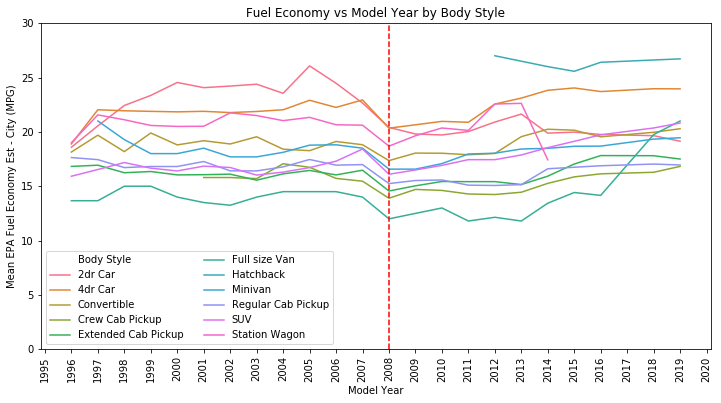

In [539]:
modelbody_mpg = fullresponse_df.groupby(['model_year', 'Body Style'])['EPA Fuel Economy Est - City (MPG)'].mean().unstack(level=1).reset_index().melt(id_vars = 'model_year')
modelbody_count = fullresponse_df.groupby(['model_year', 'Body Style'])['EPA Fuel Economy Est - City (MPG)'].count().unstack(level=1).reset_index().melt(id_vars = 'model_year')
modelbody_agg = pd.merge(modelbody_mpg, modelbody_count,  how='left', left_on=['model_year','Body Style'], right_on = ['model_year','Body Style'])

fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x = 'model_year', y = 'value_x', data = modelbody_agg, hue = 'Body Style', ax=ax);
ax.set_ylim(0,30);
ax.set_ylabel('Mean EPA Fuel Economy Est - City (MPG)');
ax.set_xlabel('Model Year');
ax.set_title('Fuel Economy vs Model Year by Body Style');
ax.set_xticks(range(1995, 2021));
ax.axvline(2008, ls='--', color = 'r');
ax.legend(loc='lower left', ncol=2)
plt.xticks(rotation='vertical')
plt.savefig('im2')

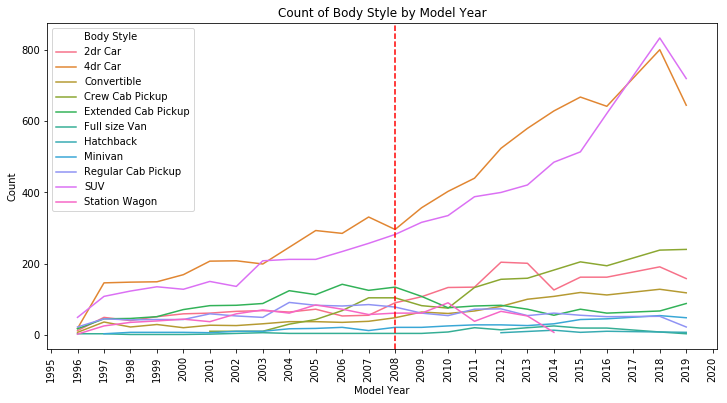

In [530]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x = 'model_year', y = 'value_y', data = modelbody_agg, hue = 'Body Style', ax=ax);
#ax.set_ylim(0,30);
ax.set_ylabel('Count');
ax.set_xlabel('Model Year');
ax.set_title('Count of Body Style by Model Year');
ax.set_xticks(range(1995, 2021));
ax.axvline(2008, ls='--', color = 'r');
plt.xticks(rotation='vertical')
plt.savefig('im3')

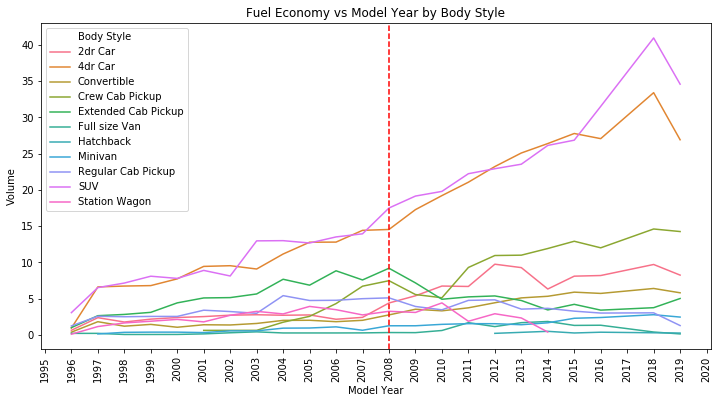

In [531]:
modelbody_agg['value_z'] = 1/modelbody_agg['value_x'] * modelbody_agg['value_y']

fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x = 'model_year', y = 'value_z', data = modelbody_agg, hue = 'Body Style', ax=ax);
#ax.set_ylim(0,30);
ax.set_ylabel('Volume');
ax.set_xlabel('Model Year');
ax.set_title('Fuel Economy vs Model Year by Body Style');
ax.set_xticks(range(1995, 2021));
ax.axvline(2008, ls='--', color = 'r');
plt.xticks(rotation='vertical')
plt.savefig('im3')

In [532]:
fullresponse_df.groupby(['model_year', 'Body Style'])['EPA Fuel Economy Est - City (MPG)'].count().unstack(level=1)

Body Style,2dr Car,4dr Car,Convertible,Crew Cab Pickup,Extended Cab Pickup,Full size Van,Hatchback,Minivan,Regular Cab Pickup,SUV,Station Wagon
model_year,,,,,,,,,,,
1996,12.0,18.0,7.0,NaN,17.0,3.0,NaN,NaN,22.0,49.0,2.0
1997,49.0,146.0,36.0,NaN,45.0,3.0,NaN,3.0,45.0,108.0,25.0
1998,40.0,148.0,22.0,NaN,46.0,1.0,NaN,7.0,42.0,123.0,35.0
1999,51.0,149.0,29.0,NaN,51.0,1.0,NaN,7.0,43.0,135.0,39.0
2000,59.0,169.0,20.0,NaN,71.0,1.0,NaN,7.0,43.0,128.0,44.0
2001,61.0,207.0,27.0,10.0,82.0,2.0,NaN,6.0,59.0,150.0,37.0
2002,66.0,208.0,26.0,10.0,83.0,4.0,NaN,10.0,53.0,136.0,59.0
2003,68.0,199.0,31.0,10.0,88.0,6.0,NaN,10.0,49.0,208.0,70.0
2004,64.0,246.0,37.0,30.0,124.0,4.0,NaN,17.0,91.0,212.0,61.0


In [533]:
df['EPA Class'].value_counts()

No Data                                10422
Compact                                 2448
Compact Cars                            1501
Mid-Size Cars                           1385
Small Sport Utility Vehicles 4WD        1006
4WD Sport Utility Vehicle                896
Mid-Size                                 883
Large Cars                               807
Subcompact Cars                          800
Small Sport Utility Vehicles 2WD         715
Midsize                                  686
Large                                    617
2WD Sport Utility Vehicle                614
Small Station Wagon                      564
Two Seater                               469
Mid-Size Station Wagon                   437
Subcompact                               406
Sub-Compact                              403
4WD Sport Utility                        378
Sport Utility Vehicle                    350
Two-Seaters                              343
Mini-Compact                             288
Midsize Ca

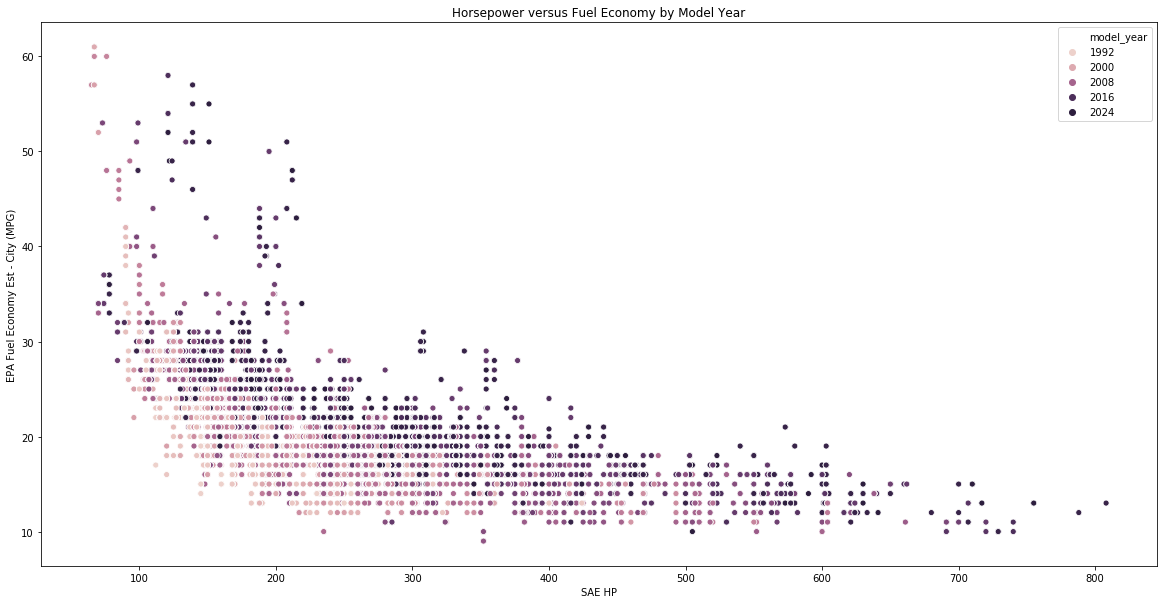

In [534]:
# how has mpg versus HP changed over the years?
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot('SAE HP', 'EPA Fuel Economy Est - City (MPG)', data = fullresponse_df, hue = 'model_year', ax=ax);
ax.set_title('Horsepower versus Fuel Economy by Model Year');
#plt.savefig('im4')

(array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
        2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
        2017, 2018, 2019, 2020]), <a list of 26 Text xticklabel objects>)

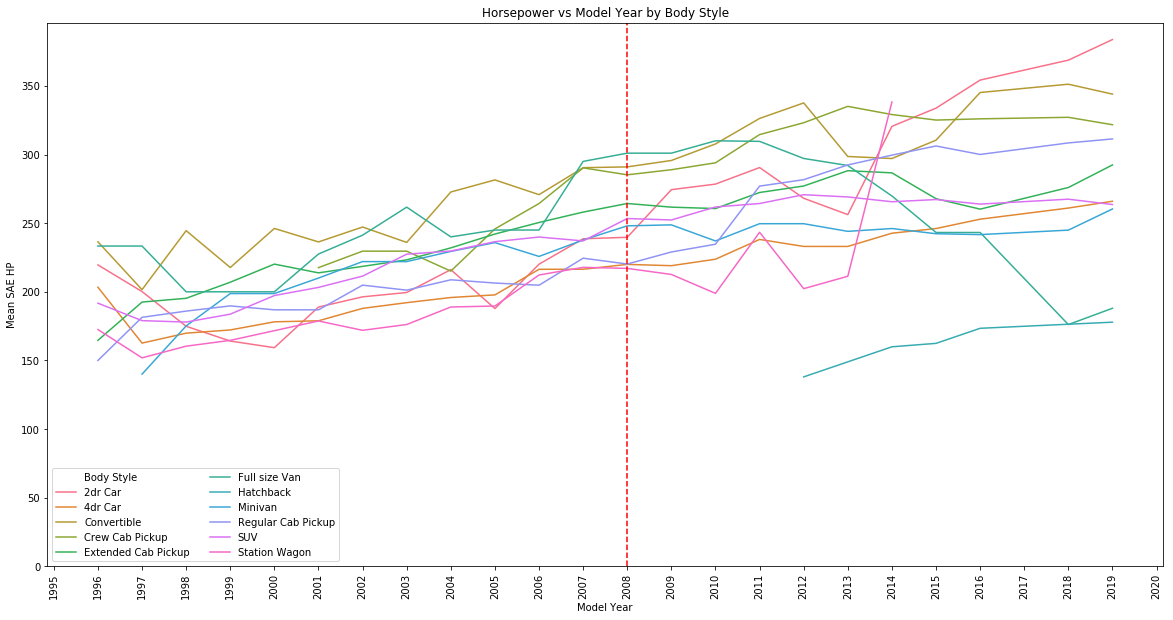

In [632]:
modelbody_mpg = fullresponse_df.groupby(['model_year', 'Body Style'])['SAE HP'].mean().unstack(level=1).reset_index().melt(id_vars = 'model_year')
modelbody_count = fullresponse_df.groupby(['model_year', 'Body Style'])['SAE HP'].count().unstack(level=1).reset_index().melt(id_vars = 'model_year')
modelbody_agg = pd.merge(modelbody_mpg, modelbody_count,  how='left', left_on=['model_year','Body Style'], right_on = ['model_year','Body Style'])

fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x = 'model_year', y = 'value_x', data = modelbody_agg, hue = 'Body Style', ax=ax);
ax.set_ylim(0,);
ax.set_ylabel('Mean SAE HP');
ax.set_xlabel('Model Year');
ax.set_title('Horsepower vs Model Year by Body Style');
ax.set_xticks(range(1995, 2021));
ax.axvline(2008, ls='--', color = 'r');
ax.legend(loc='lower left', ncol=2)
plt.xticks(rotation='vertical')
#plt.savefig('im5')

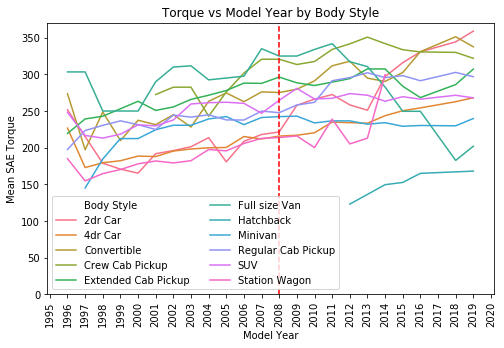

In [540]:
modelbody_mpg = fullresponse_df.groupby(['model_year', 'Body Style'])['SAE Torque'].mean().unstack(level=1).reset_index().melt(id_vars = 'model_year')
modelbody_count = fullresponse_df.groupby(['model_year', 'Body Style'])['SAE Torque'].count().unstack(level=1).reset_index().melt(id_vars = 'model_year')
modelbody_agg = pd.merge(modelbody_mpg, modelbody_count,  how='left', left_on=['model_year','Body Style'], right_on = ['model_year','Body Style'])

fig, ax = plt.subplots(figsize=(8,5))
sns.lineplot(x = 'model_year', y = 'value_x', data = modelbody_agg, hue = 'Body Style', ax=ax);
ax.set_ylim(0,);
ax.set_ylabel('Mean SAE Torque');
ax.set_xlabel('Model Year');
ax.set_title('Torque vs Model Year by Body Style');
ax.set_xticks(range(1995, 2021));
ax.axvline(2008, ls='--', color = 'r');
ax.legend(loc='lower left', ncol=2)
plt.xticks(rotation='vertical');
#plt.savefig('im5')

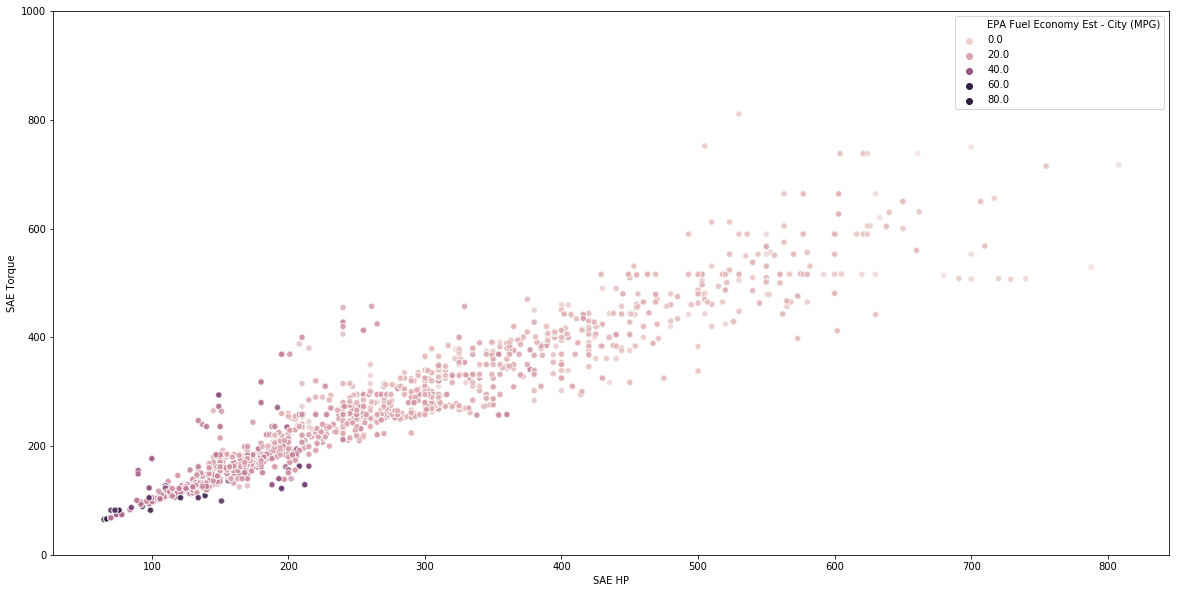

In [449]:
# no surprises here
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot('SAE HP', 'SAE Torque', data = fullresponse_df, hue = 'EPA Fuel Economy Est - City (MPG)', ax=ax, alpha = .5);
ax.set_ylim(0,1000);

In [442]:
# this funtion will take a dataset and model and output X and y matrices for model processing
def dataprep(df, response):
    '''
    INPUT:
    df - dataframe ready for processing
    response - the name of the response variable column
    
    OUTPUT:
    X - a predictor variable dataframe, with dummy variables in place of all object columns
    y - a response variable dataframe
    '''
    
    cat_list = df.select_dtypes(include = ['object']).columns.tolist()
    dummies = pd.get_dummies(df[cat_list], prefix = cat_list, dummy_na = False, drop_first = True)
    X = df.drop(columns = cat_list).join(dummies).drop(columns = [response])
    y = df[response]
    return X, y

In [443]:
# this function will take X and y dataframes and a model and output the trained model and the r_2 score
def supervised_model(X, y, model, test_size = .3, random_state = 13):
    '''
    INPUT:
    X - predictor variable dataframe
    y - response variable dataframe
    model - initialized model to be trained
    test_size - fraction of data to use as testing, expecting float between 0 and 1
    random_state - random state to use
    
    OUTPUT:
    model - trained model
    X_train - training data (used for column names)
    train_score - r_2 score of trained model on training set
    test_score - r_2 score of trained model on testing set
    '''
    # develop train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)
    # fit model
    model.fit(X_train, y_train)
    # run predictions
    y_train_preds = model.predict(X_train)
    y_test_preds = model.predict(X_test)
    # score predictions
    train_score = r2_score(y_train, y_train_preds)
    test_score = r2_score(y_test, y_test_preds)
    return model, X_train, train_score, test_score

In [444]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

In [445]:
# Get X, y
X, y = dataprep(fullresponse_df, 'EPA Fuel Economy Est - City (MPG)')

# instantiate and train model
lm_model = LinearRegression(normalize=True)
lm_model, X_train, train_score, test_score = supervised_model(X, y, lm_model)
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

#A quick look at the top results
coef_df = coef_weights(lm_model.coef_, X_train)
coef_df.head(5)

The rsquared on the training data was 0.6845382205262232.  The rsquared on the test data was 0.6785450904167607.


,est_int,coefs,abs_coefs
51,Fuel System_Turbo-Diesel,11.857543,11.857543
16,Fuel System_DISI,-7.497949,7.497949
53,Fuel System_Turbocharged DI,6.860353,6.860353
17,Fuel System_DOHC FSI Direct,-6.463241,6.463241
49,Fuel System_TFSI,-6.135786,6.135786


In [446]:
# instantiate and train model
rf_model = RandomForestRegressor()
rf_model, X_train, train_score, test_score = supervised_model(X, y, rf_model)
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))
#coef_df = coef_weights(rf_model.coef_, X_train)

#A quick look at the top results
#coef_df.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The rsquared on the training data was 0.9953553574546695.  The rsquared on the test data was 0.9782792849265701.


In [447]:
# instantiate and train model
svr_model = SVR(verbose = True)
svr_model, X_train, train_score, test_score = supervised_model(X, y, svr_model)
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))
#coef_df = coef_weights(svr_model.coef_, X_train)

# A quick look at the top results
#coef_df.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM]The rsquared on the training data was 0.24811506091198687.  The rsquared on the test data was 0.05474870750651173.


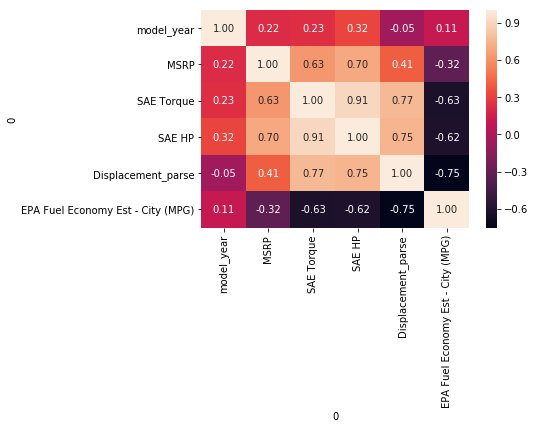

In [638]:
sns.heatmap(fullresponse_df.corr(), annot = True, fmt = '.2f')

In [542]:
# Predicting the fuel economy of lighter cars
MPG_features_2 = ['model_year', 'MSRP', 'Body Style', 'SAE Torque', 'SAE HP', 'Displacement_parse', 'Drivetrain', 'Fuel System', 'EPA Fuel Economy Est - City (MPG)', 'Base Curb Weight (lbs)']
# removed: model, EPA Class, 
fullresponse_df_2 = df.dropna(subset = ['EPA Fuel Economy Est - City (MPG)'])[MPG_features_2]
fullresponse_df_2.dropna(inplace = True)
fullresponse_df_2.shape

(18645, 10)

In [543]:
fullresponse_df_2['Drivetrain'] = fullresponse_df_2['Drivetrain'].map(drivetrain_dict)
fullresponse_df_2['Body Style'] = fullresponse_df_2['Body Style'].map(bodystyle_dict)
fullresponse_df_2.shape

(18645, 10)

In [552]:
#fullresponse_df_2['Base Curb Weight (lbs)'].sort_values(ascending = False)
# drop weight outliers
fullresponse_df_2 = fullresponse_df_2[fullresponse_df_2['Base Curb Weight (lbs)'] < 10000]

In [653]:
# get X and y
X, y = dataprep(fullresponse_df_2, 'EPA Fuel Economy Est - City (MPG)')

# instantiate model
rf_model = RandomForestRegressor(n_estimators = 100)

# train and test
rf_model, X_train, train_score, test_score = supervised_model(X, y, rf_model)
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.996733395269842.  The rsquared on the test data was 0.9783945291663987.


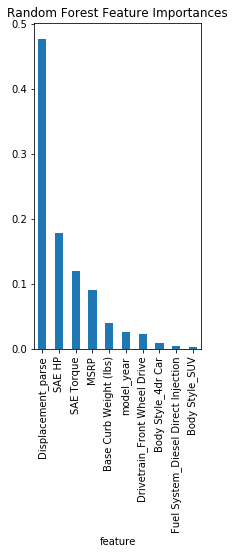

In [661]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf_model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(10).plot.bar(title='Random Forest Feature Importances', legend = False, figsize = (3,6));
plt.savefig('im9', bbox_inches = "tight")

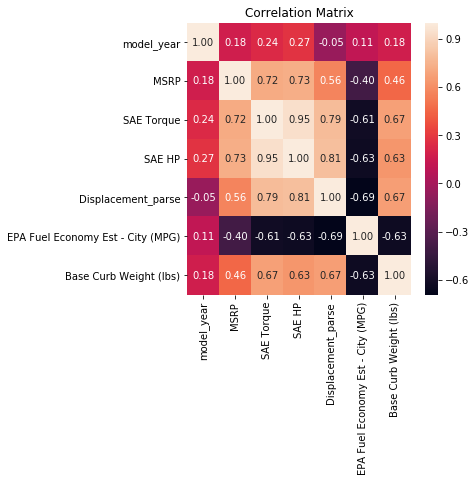

In [642]:
fig, ax = plt.subplots(figsize = (5,5))
sns_plot = sns.heatmap(fullresponse_df_2.corr(), annot = True, fmt = '.2f');
sns_plot.set_title('Correlation Matrix')
sns_plot.set_xlabel('')
sns_plot.set_ylabel('')
sns_plot.get_figure().savefig('im7', bbox_inches = "tight")

(array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
        2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
        2017, 2018, 2019, 2020]), <a list of 26 Text xticklabel objects>)

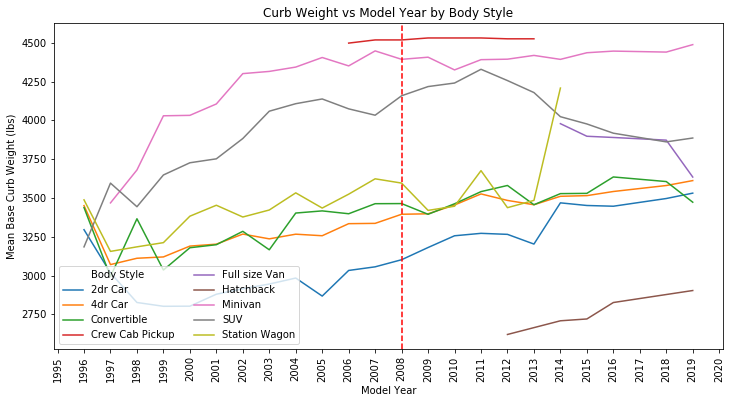

In [555]:
modelbody_mpg = fullresponse_df_2.groupby(['model_year', 'Body Style'])['Base Curb Weight (lbs)'].mean().unstack(level=1).reset_index().melt(id_vars = 'model_year')
modelbody_count = fullresponse_df_2.groupby(['model_year', 'Body Style'])['Base Curb Weight (lbs)'].count().unstack(level=1).reset_index().melt(id_vars = 'model_year')
modelbody_agg = pd.merge(modelbody_mpg, modelbody_count,  how='left', left_on=['model_year','Body Style'], right_on = ['model_year','Body Style'])

fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x = 'model_year', y = 'value_x', data = modelbody_agg, hue = 'Body Style', ax=ax);
#ax.set_ylim(0,30);
ax.set_ylabel('Mean Base Curb Weight (lbs)');
ax.set_xlabel('Model Year');
ax.set_title('Curb Weight vs Model Year by Body Style');
ax.set_xticks(range(1995, 2021));
ax.axvline(2008, ls='--', color = 'r');
ax.legend(loc='lower left', ncol=2);
plt.xticks(rotation='vertical');
#plt.savefig('im2')

In [569]:
fullresponse_df_2[fullresponse_df_2['Body Style'] == '4dr Car'].median()

0
model_year                            2012.0
MSRP                                 27600.0
SAE Torque                             207.0
SAE HP                                 200.0
Displacement_parse                       2.4
EPA Fuel Economy Est - City (MPG)       22.0
Base Curb Weight (lbs)                3373.0
dtype: float64

In [570]:
fullresponse_df_2[fullresponse_df_2['Body Style'] == '4dr Car']['Drivetrain'].value_counts()

Front Wheel Drive    4927
All Wheel Drive      1937
Rear Wheel Drive     1339
4 Wheel Drive           2
Name: Drivetrain, dtype: int64

In [586]:
testdf = fullresponse_df_2[fullresponse_df_2['Body Style'] == '4dr Car']
#testdf = testdf[testdf['model_year'] > 2008]

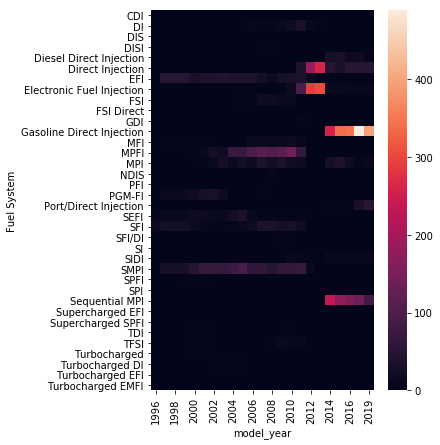

In [637]:
fix, ax = plt.subplots(figsize = (5,7))
sns.heatmap(testdf.groupby(['Fuel System', 'model_year'])['EPA Fuel Economy Est - City (MPG)'].count().unstack(level=1).fillna(0), ax = ax);
plt.savefig('im6')

In [673]:
testdf.groupby('model_year').median().tail(2)

,MSRP,SAE Torque,SAE HP,Displacement_parse,EPA Fuel Economy Est - City (MPG),Base Curb Weight (lbs)
model_year,,,,,,
2018,38700.0,261.0,248.0,2.0,23.0,3572.0
2019,38295.0,260.0,250.0,2.0,22.0,3649.0


In [689]:
testcar = {'model_year':2019,
           'MSRP': 30000,
           'SAE Torque':100,
           'Body Style_4dr Car':1,
           'SAE HP': 100,
           'Displacement_parse': 1.25,
           'Drivetrain_Front Wheel Drive':1,
           'Fuel System_Gasoline Direct Injection': 1,
           'Base Curb Weight (lbs)':2500}

zero_data = np.zeros(shape=(1,len(X_train.columns)))
testcar_df  = pd.DataFrame(zero_data, columns=X_train.columns)

for col in testcar_df:
    if col in testcar.keys():
        testcar_df[col].iloc[0] = testcar[col]
testcar_df[[key for key in testcar.keys()] ]

,model_year,MSRP,SAE Torque,Body Style_4dr Car,SAE HP,Displacement_parse,Drivetrain_Front Wheel Drive,Fuel System_Gasoline Direct Injection,Base Curb Weight (lbs)
0,2019.0,30000.0,100.0,1.0,100.0,1.25,1.0,1.0,2500.0


In [690]:
rf_model.predict(testcar_df)

array([42.91])

In [674]:
fullresponse_df_2[fullresponse_df_2['Body Style'] == '4dr Car']['EPA Fuel Economy Est - City (MPG)'].max()

60.0

In [684]:
df[df['EPA Fuel Economy Est - City (MPG)']==60.0][['model', 'MSRP', 'Gas Mileage', 'EPA Class', 'SAE HP', 'SAE Torque', 'Displacement_parse', 'Base Curb Weight (lbs)']]

,model,MSRP,Gas Mileage,EPA Class,SAE HP,SAE Torque,Displacement_parse,Base Curb Weight (lbs)
14140,2006 Honda Insight Specs: MT with A/C,20530.0,60 mpg City/66 mpg Hwy,Two Seater,67.0,66.0,1.0,1881.0
14141,2006 Honda Insight Specs: MT,19330.0,60 mpg City/66 mpg Hwy,Two Seater,67.0,66.0,1.0,1850.0
14146,2004 Honda Insight Specs: 3-Door HB Manual w/A...,20380.0,60 mpg City/66 mpg Hwy,Two Seater,67.0,66.0,1.0,1881.0
14147,2004 Honda Insight Specs: 3-Door HB Manual,19180.0,60 mpg City/66 mpg Hwy,Two Seater,67.0,66.0,1.0,1850.0
28715,2007 Toyota Prius Specs: 5-Door HB,22175.0,60 mpg City/51 mpg Hwy,Mid-size,76.0,82.0,1.5,2932.0
28716,2007 Toyota Prius Specs: 5-Door HB Touring,23070.0,60 mpg City/51 mpg Hwy,Mid-size,76.0,82.0,1.5,2932.0
28718,2005 Toyota Prius Specs: 5-Door HB,21275.0,60 mpg City/51 mpg Hwy,Mid-size,76.0,82.0,1.5,2890.0
28719,2004 Toyota Prius Specs: 5-Door HB,20295.0,60 mpg City/51 mpg Hwy,Mid-size,76.0,82.0,1.5,2890.0
